# Blinkit Sales Analytics – Exploratory Data Analysis

## Objective
Perform exploratory data analysis on cleaned Blinkit datasets to uncover
business insights related to sales, products, customers, and operations.

This analysis uses:
- Orders (fact table)
- Order items
- Products
- Customers

Other datasets will be introduced in later phases.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [12]:
orders = pd.read_csv("../data/interim/orders_clean.csv")
order_items = pd.read_csv("../data/interim/order_items_clean.csv")
products = pd.read_csv("../data/interim/products_clean.csv")
customers = pd.read_csv("../data/interim/customers_clean.csv")


In [13]:
sales_df = (
    order_items
    .merge(orders, on="order_id", how="left")
    .merge(products, on="product_id", how="left")
)


In [14]:
sales_df.columns


Index(['order_id', 'product_id', 'quantity', 'unit_price', 'customer_id',
       'order_date', 'promised_delivery_time', 'actual_delivery_time',
       'delivery_status', 'order_total', 'payment_method',
       'delivery_partner_id', 'store_id', 'product_name', 'category', 'brand',
       'price', 'mrp', 'margin_percentage', 'shelf_life_days',
       'min_stock_level', 'max_stock_level'],
      dtype='str')

In [15]:
sales_df["order_value"] = sales_df["order_total"]

# Overall Sales Performance

In [16]:
total_revenue = sales_df["order_value"].sum()
total_orders = orders["order_id"].nunique()

print(f"Total Revenue: ₹{total_revenue:,.0f}")
print(f"Total Orders: {total_orders}")


Total Revenue: ₹11,009,308
Total Orders: 5000


# Top 10 Products by Revenue

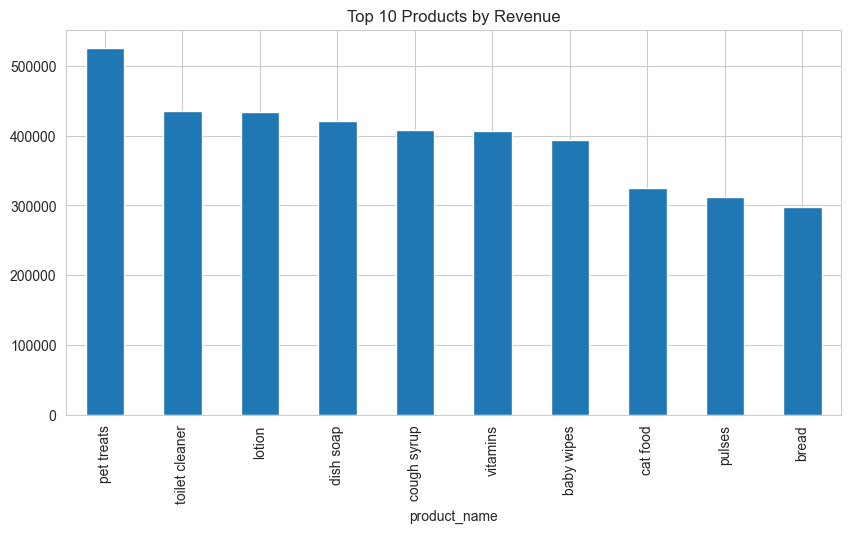

In [17]:
top_products = (
    sales_df
    .groupby("product_name")["order_value"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind="bar", figsize=(10,5), title="Top 10 Products by Revenue")
plt.show()


# Category-wise Sales

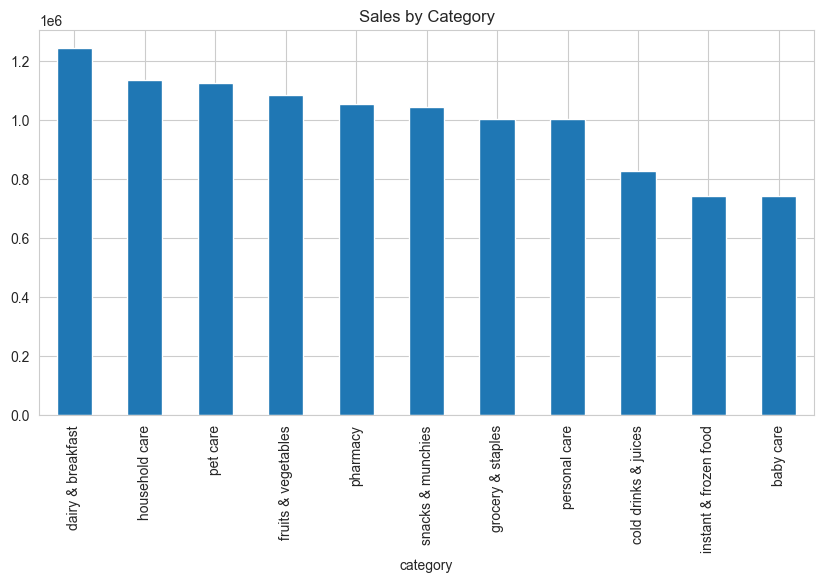

In [18]:
category_sales = (
    sales_df
    .groupby("category")["order_value"]
    .sum()
    .sort_values(ascending=False)
)

category_sales.plot(kind="bar", figsize=(10,5), title="Sales by Category")
plt.show()


# Customer Order Distribution

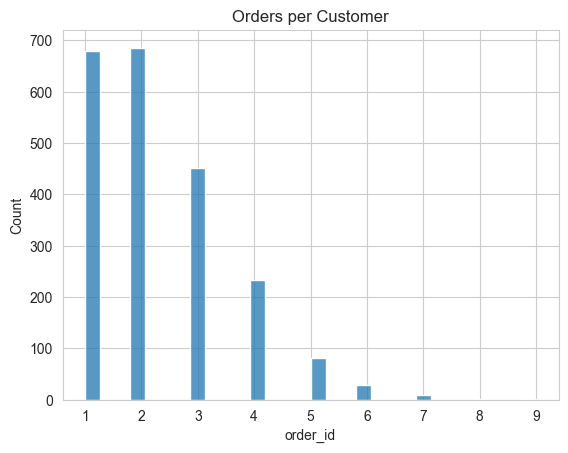

In [19]:
customer_orders = orders.groupby("customer_id")["order_id"].count()

sns.histplot(customer_orders, bins=30)
plt.title("Orders per Customer")
plt.show()


# Sales Over Time

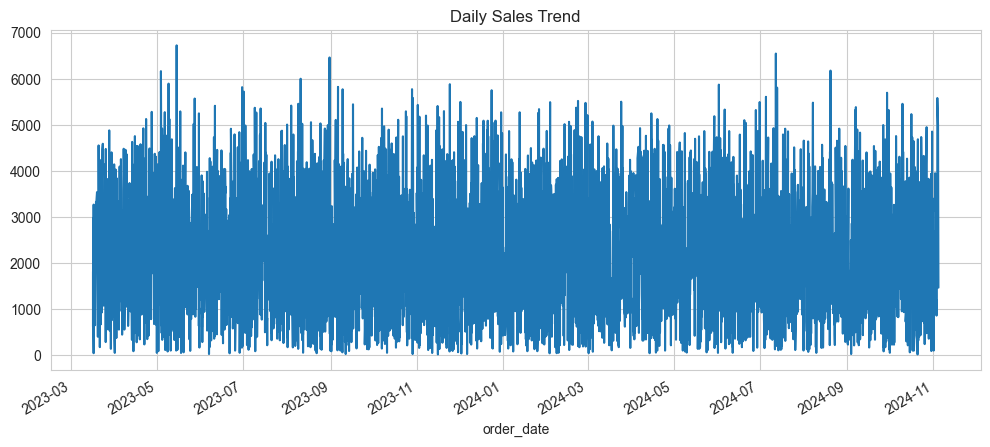

In [21]:
sales_df["order_date"] = pd.to_datetime(sales_df["order_date"])

daily_sales = (
    sales_df.groupby("order_date")["order_value"]
    .sum()
)

daily_sales.plot(figsize=(12,5), title="Daily Sales Trend")
plt.show()


In [22]:
daily_sales.sum(), sales_df["order_value"].sum()


(np.float64(11009308.5), np.float64(11009308.5))

# Delivery Impact

In [31]:
delivery.columns


Index(['order_id', 'delivery_partner_id', 'promised_time', 'actual_time',
       'delivery_time_minutes', 'distance_km', 'delivery_status',
       'reasons_if_delayed'],
      dtype='str')

In [32]:
delivery_sales = sales_df.merge(
    delivery[["order_id", "delivery_time_minutes", "delivery_status"]],
    on="order_id",
    how="left"
)


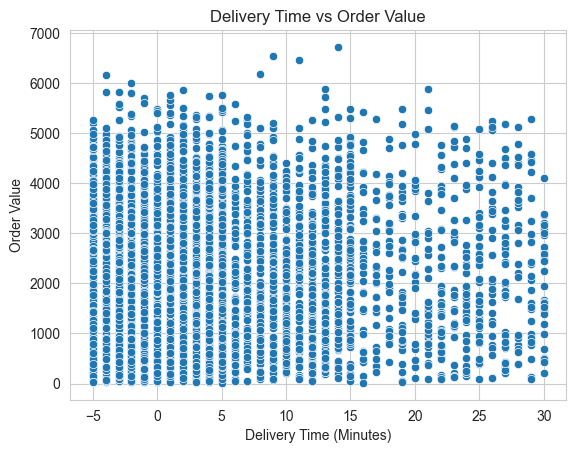

In [33]:
delivery = pd.read_csv("../data/interim/delivery_clean.csv")

delivery_sales = orders.merge(delivery, on="order_id", how="left")
sns.scatterplot(
    x=delivery_sales["delivery_time_minutes"],
    y=delivery_sales["order_total"]
)

plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Order Value")
plt.title("Delivery Time vs Order Value")
plt.show()

In [35]:
delivery_sales.columns


Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status_x', 'order_total',
       'payment_method', 'delivery_partner_id_x', 'store_id',
       'delivery_partner_id_y', 'promised_time', 'actual_time',
       'delivery_time_minutes', 'distance_km', 'delivery_status_y',
       'reasons_if_delayed'],
      dtype='str')

In [36]:
delivery_sales = delivery_sales.rename(
    columns={
        "delivery_status_y": "delivery_status",
        "delivery_partner_id_y": "delivery_partner_id"
    }
)


In [41]:
delivery_sales.groupby("delivery_status")["order_total"].mean()


delivery_status
On Time                  2201.305576
Significantly Delayed    2223.359574
Slightly Delayed         2193.502295
Name: order_total, dtype: float64

In [42]:
delivery_sales.groupby("delivery_status")["delivery_time_minutes"].mean()


delivery_status
On Time                   0.013833
Significantly Delayed    22.843813
Slightly Delayed         10.515911
Name: delivery_time_minutes, dtype: float64

In [43]:
# Standardize revenue column once
delivery_sales.rename(columns={"order_total": "order_value"}, inplace=True)


## Key Insights

- A small set of products contributes a large portion of revenue
- Certain categories dominate overall sales
- Majority of customers are one-time buyers
- Sales show temporal patterns
- Longer delivery times may negatively impact order value
